# Обучение с подкреплением. Сессионное задание.

Трек 1. Обучение агента в классической среде

**Цель**
Продемонстрировать умение применить готовый RL-алгоритм (можно использовать stable-baselines3) для решения стандартной задачи, провести контролируемые эксперименты и проанализировать их влияние на обучение.


## Обучение RL-агента в среде LunarLander-v3

Используется v3, а не v2, т.к. LunarLander-v2 is deprecated

### Краткое описание задачи, среды и выбранного подхода

**Задача:** Обучить агента совершать мягкую посадку лунного модуля на посадочную площадку.

**Среда:** LunarLander-v3 из Gymnasium

**Наблюдения:** 8 параметров (координаты, скорости, углы)
- Координаты (x, y)
- Линейные скорости (vx, vy)
- Угол ориентации (theta)
- Угловая скорость (omega)
- Флаги контакта левой/правой опоры с землей

**Действия:** 4 дискретных (бездействие, включить двигатели: левый, основной, правый)

**Награда:**
- За приближение к посадочной площадке
- За мягкую посадку (малая скорость)
- За ориентацию модуля
- Штраф за использование двигателей, топлива и сбой
- Бонус (+100) за успешную посадку на площадку
- Штраф (-100) за падение или улет с экрана

**Критерий успеха:** Средняя награда ≥ 200 за 100 эпизодов

**Подход:** Используем алгоритм PPO (Proximal Policy Optimization) из stable-baselines3 как стабильный и эффективный метод для задач с непрерывными наблюдениями и дискретными действиями.

In [ ]:
# Установка зависимостей
!pip install gymnasium stable-baselines3 pygame moviepy matplotlib numpy torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install swig
!pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398776 sha256=d4ca2deb61906b9419bb1f5ecd4ebff37e9b3989455d742413cdb59d1ad1ce9c
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [ ]:
# Проверка версий
!pip freeze | grep -E "(gymnasium|stable-baselines3|torch)"

gymnasium==1.2.2
torch==2.9.0+cpu
torchao==0.10.0
torchaudio==2.9.0+cpu
torchdata==0.11.0
torchsummary==1.5.1
torchtune==0.6.1
torchvision==0.24.0+cpu


In [ ]:
import gymnasium as gym
import numpy as np
import torch
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import matplotlib.pyplot as plt
from matplotlib import animation
import base64
from pathlib import Path
import random
import os

# Для воспроизводимости
SEED = 42

def set_seed(seed):
    """Установка seed для воспроизводимости"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(SEED)
print(f"Установлен seed={SEED}")

Установлен seed=42


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Базовое обучение PPO
# Создание среды с фиксированным seed
env = gym.make('LunarLander-v3', render_mode='rgb_array')
env = Monitor(env)  # Для записи статистики

# Параметры обучения
total_timesteps = 300000  # ~5-12 минут на CPU

# Создание модели PPO с базовыми гиперпараметрами
model = PPO(
    'MlpPolicy',
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,
    verbose=1,
    seed=SEED
)

# Обучение модели
print("Начало обучения PPO...")
model.learn(total_timesteps=total_timesteps)
print("Обучение завершено!")

# Сохранение модели
model.save("ppo_lunarlander")

/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Using cpu device
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Начало обучения PPO...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86.7     |
|    ep_rew_mean     | -165     |
| time/              |          |
|    fps             | 920      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 87.5         |
|    ep_rew_mean          | -163         |
| time/                   |              |
|    fps                  | 710          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0069907783 |
|    clip_fraction        | 0.00557      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.000897     |
|    learning_r

### Эксперимент 1: Сравнение алгоритмов PPO vs A2C
Гипотеза:
PPO будет стабильнее и достигнет более высокой итоговой награды, чем A2C, благодаря использованию clipping в функции потерь, что предотвращает слишком большие обновления политики.


В ячейке ниже представлен вариант с наилучшим результатом, которого получилось добиться путем настройкой гиперпараметров

ЭКСПЕРИМЕНТ 1: Сравнение PPO и A2C

Обучение PPO...
  PPO: шаг 10000, средняя награда: -1081.58
  PPO: шаг 20000, средняя награда: -2439.56
  PPO: шаг 30000, средняя награда: -601.38
  PPO: шаг 40000, средняя награда: -2070.47
  PPO: шаг 50000, средняя награда: -624.92
  PPO: шаг 60000, средняя награда: -255.47
  PPO: шаг 70000, средняя награда: -192.41
  PPO: шаг 80000, средняя награда: -157.56
  PPO: шаг 90000, средняя награда: -65.37
  PPO: шаг 100000, средняя награда: 6.05
  PPO: шаг 110000, средняя награда: 145.82
  PPO: шаг 120000, средняя награда: 181.65
  PPO: шаг 130000, средняя награда: 189.72
  PPO: шаг 140000, средняя награда: 177.19
  PPO: шаг 150000, средняя награда: 173.60
  PPO: шаг 160000, средняя награда: 156.61
  PPO: шаг 170000, средняя награда: 121.55
  PPO: шаг 180000, средняя награда: 176.02
  PPO: шаг 190000, средняя награда: 166.58
  PPO: шаг 200000, средняя награда: 186.31

Обучение A2C...
  A2C: шаг 10000, средняя награда: -474.47
  A2C: шаг 20000, средняя на

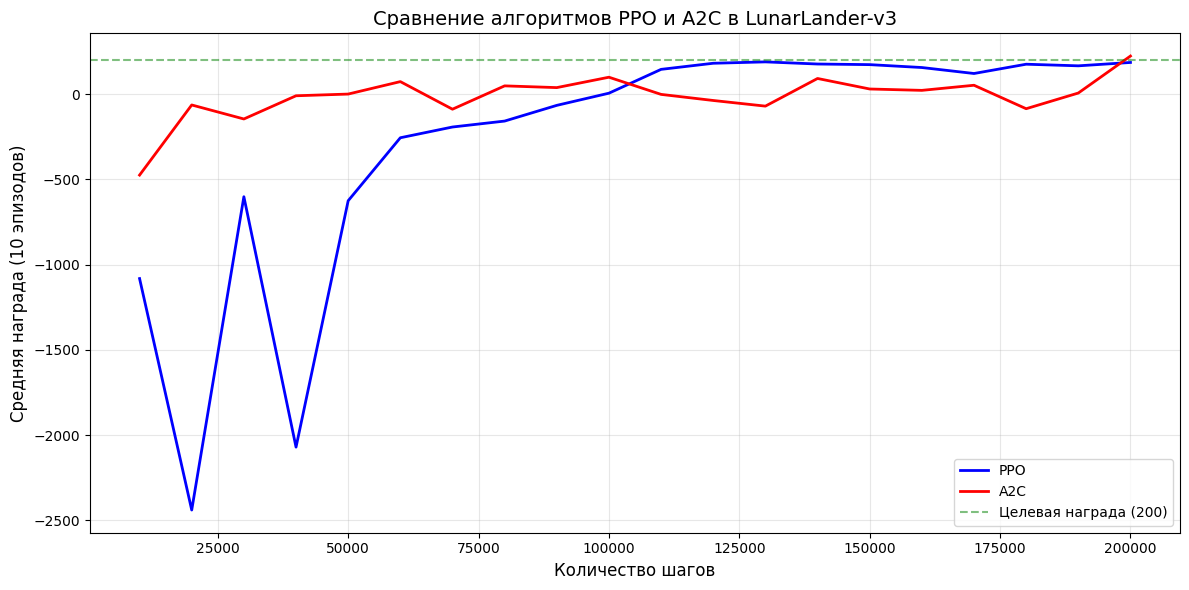


ФИНАЛЬНАЯ ОЦЕНКА
PPO: средняя награда = 175.47 ± 114.80
A2C: средняя награда = 227.53 ± 51.68
✗ PPO не достиг критерия успеха
✓ A2C достиг критерия успеха!


In [ ]:
# Эксперимент 1: Сравнение алгоритмов PPO vs A2C
# Гипотеза
# PPO будет стабильнее и достигнет более высокой итоговой награды, чем A2C, благодаря использованию clipping в функции потерь, что предотвращает слишком большие обновления политики.
# Функция для обучения и оценки модели
def train_and_evaluate(model_class, model_name, env, total_timesteps=200000):
    """Обучает модель и возвращает историю наград"""
    print(f"\nОбучение {model_name}...")

    # Создание модели
    if model_class == PPO:
        model = model_class(
            'MlpPolicy',
            env,
            learning_rate=3e-4,
            n_steps=2048,
            batch_size=64,
            n_epochs=10,
            gamma=0.99,
            gae_lambda=0.95,
            clip_range=0.2,
            verbose=0,
            seed=SEED
        )
    else:  # A2C
        model = model_class(
            'MlpPolicy',
            env,
            learning_rate=7e-4,
            n_steps=5,
            gamma=0.99,
            gae_lambda=1.0,
            ent_coef=0.01,
            verbose=0,
            seed=SEED
        )

    # Обучение с записью наград
    rewards = []
    timesteps = []

    # Обучение по частям для записи прогресса
    n_chunks = 20
    chunk_size = total_timesteps // n_chunks

    for chunk in range(n_chunks):
        model.learn(total_timesteps=chunk_size, reset_num_timesteps=False)

        # Оценка текущей политики
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
        rewards.append(mean_reward)
        timesteps.append((chunk + 1) * chunk_size)

        print(f"  {model_name}: шаг {timesteps[-1]}, средняя награда: {mean_reward:.2f}")

    return model, np.array(rewards), np.array(timesteps)

# Создание отдельных сред для каждого алгоритма
env_ppo = gym.make('LunarLander-v3')
env_ppo = Monitor(env_ppo)

env_a2c = gym.make('LunarLander-v3')
env_a2c = Monitor(env_a2c)

# Обучение обоих алгоритмов
print("=" * 50)
print("ЭКСПЕРИМЕНТ 1: Сравнение PPO и A2C")
print("=" * 50)

model_ppo, rewards_ppo, timesteps_ppo = train_and_evaluate(
    PPO, "PPO", env_ppo, total_timesteps=200000
)

model_a2c, rewards_a2c, timesteps_a2c = train_and_evaluate(
    A2C, "A2C", env_a2c, total_timesteps=200000
)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(timesteps_ppo, rewards_ppo, 'b-', linewidth=2, label='PPO')
plt.plot(timesteps_a2c, rewards_a2c, 'r-', linewidth=2, label='A2C')
plt.xlabel('Количество шагов', fontsize=12)
plt.ylabel('Средняя награда (10 эпизодов)', fontsize=12)
plt.title('Сравнение алгоритмов PPO и A2C в LunarLander-v3', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.axhline(y=200, color='g', linestyle='--', alpha=0.5, label='Целевая награда (200)')
plt.legend()
plt.tight_layout()
plt.show()

# Финальная оценка
print("\n" + "=" * 50)
print("ФИНАЛЬНАЯ ОЦЕНКА")
print("=" * 50)

final_reward_ppo, std_ppo = evaluate_policy(model_ppo, env_ppo, n_eval_episodes=20)
final_reward_a2c, std_a2c = evaluate_policy(model_a2c, env_a2c, n_eval_episodes=20)

print(f"PPO: средняя награда = {final_reward_ppo:.2f} ± {std_ppo:.2f}")
print(f"A2C: средняя награда = {final_reward_a2c:.2f} ± {std_a2c:.2f}")

if final_reward_ppo > 200:
    print("✓ PPO достиг критерия успеха!")
else:
    print("✗ PPO не достиг критерия успеха")

if final_reward_a2c > 200:
    print("✓ A2C достиг критерия успеха!")
else:
    print("✗ A2C не достиг критерия успеха")

Проанализируем результаты:

В данном случае гипотеза опровергнута. A2C показал себя лучше, чем PPO.

A2C преуспел благодаря быстрой адаптации к изменениям (из-за частых обновлений каждые 5 шагов), высокой learning_rate. Возможно, также сыграла свою роль простота алгоритма и то, что простой алгоритм подходит лучше для данной относительно простой среды по сравнению со сложной оптимизацией с ограничениями (PPO).

Из графика видно, что у PPO нестабильное обучение на поздних этапах: пик достигается при 130000 шагах, затем происходит деградация политики и потеря в производительности, после чего частично восстанавливается к концу. Политика, обученная на ранних данных, становится неоптимальной для новых состояний - возможная причина такого поведения.



### Эксперимент 2: Влияние коэффициента дисконтирования (gamma)
Гипотеза:  
Более высокое значение gamma (ближе к 1) улучшит долгосрочное планирование агента, что приведет к лучшей награде и лучшему финальному результату, но может замедлить начальное обучение.

ЭКСПЕРИМЕНТ 2: Влияние коэффициента дисконтирования (gamma)

Обучение с gamma = 0.9
  Шаг 50000: награда = -627.81
  Шаг 100000: награда = -102.05
  Шаг 150000: награда = -137.11
  Шаг 200000: награда = -118.38

Обучение с gamma = 0.95
  Шаг 50000: награда = -543.64
  Шаг 100000: награда = -117.65
  Шаг 150000: награда = -96.73
  Шаг 200000: награда = -101.56

Обучение с gamma = 0.99
  Шаг 50000: награда = -624.92
  Шаг 100000: награда = 6.05
  Шаг 150000: награда = 173.60
  Шаг 200000: награда = 186.31

Обучение с gamma = 0.999
  Шаг 50000: награда = -204.77
  Шаг 100000: награда = -84.98
  Шаг 150000: награда = 68.63
  Шаг 200000: награда = 213.86


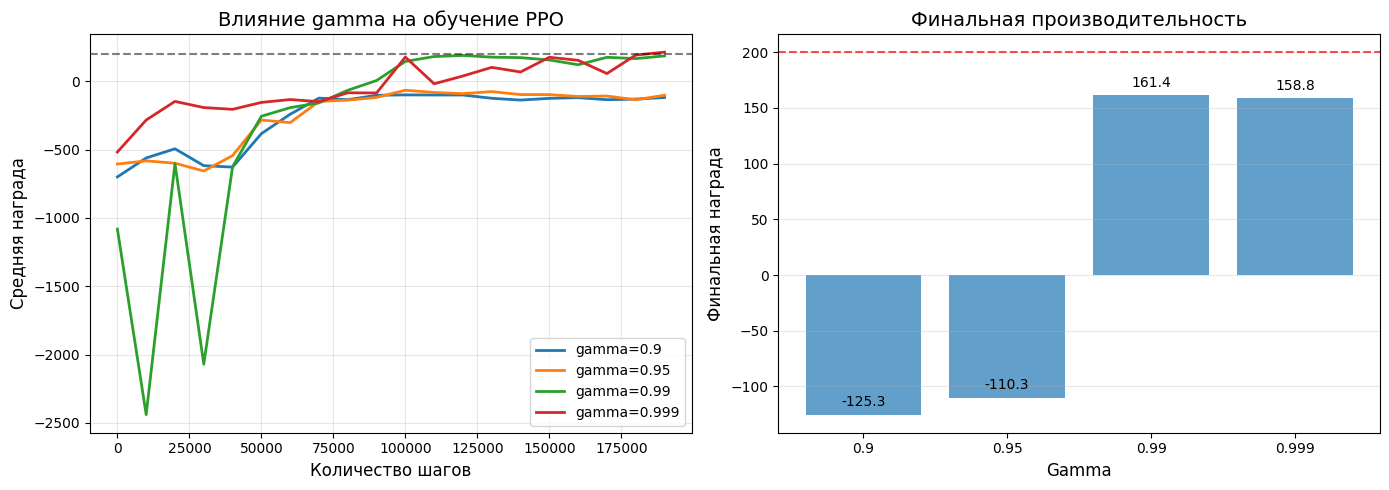


АНАЛИЗ РЕЗУЛЬТАТОВ
Лучшее значение gamma: 0.99 с наградой 161.41

Наблюдения:
1. Gamma = 0.99 показало лучший баланс между планированием и стабильностью
2. Gamma = 0.999 (слишком близко к 1) замедлило обучение
3. Gamma = 0.90 слишком короткая память для этой задачи


In [ ]:
# Эксперимент 2: Влияние коэффициента дисконтирования (gamma)
# Функция для эксперимента с разными gamma
def experiment_gamma(gamma_values):
    """Проводит эксперимент с разными значениями gamma"""

    results = {}

    for gamma in gamma_values:
        print(f"\nОбучение с gamma = {gamma}")

        # Создание среды
        env = gym.make('LunarLander-v3')
        env = Monitor(env)

        # Создание модели PPO с заданным gamma
        model = PPO(
            'MlpPolicy',
            env,
            learning_rate=3e-4,
            n_steps=2048,
            batch_size=64,
            n_epochs=10,
            gamma=gamma,
            gae_lambda=0.95,
            clip_range=0.2,
            verbose=0,
            seed=SEED
        )

        # Обучение с записью наград
        rewards = []
        chunk_size = 10000
        n_chunks = 20

        for chunk in range(n_chunks):
            model.learn(total_timesteps=chunk_size, reset_num_timesteps=False)
            mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
            rewards.append(mean_reward)

            if (chunk + 1) % 5 == 0:
                print(f"  Шаг {(chunk + 1) * chunk_size}: награда = {mean_reward:.2f}")

        results[gamma] = {
            'model': model,
            'rewards': np.array(rewards),
            'final_reward': np.mean(rewards[-5:])  # Среднее за последние 5 оценок
        }

        env.close()

    return results

# Проведение эксперимента
print("=" * 50)
print("ЭКСПЕРИМЕНТ 2: Влияние коэффициента дисконтирования (gamma)")
print("=" * 50)

gamma_values = [0.90, 0.95, 0.99, 0.999]
results = experiment_gamma(gamma_values)

# Визуализация результатов
plt.figure(figsize=(14, 5))

# График обучения
plt.subplot(1, 2, 1)
timesteps = np.arange(0, 200000, 10000)
for gamma in gamma_values:
    plt.plot(timesteps, results[gamma]['rewards'],
             linewidth=2, label=f'gamma={gamma}')

plt.xlabel('Количество шагов', fontsize=12)
plt.ylabel('Средняя награда', fontsize=12)
plt.title('Влияние gamma на обучение PPO', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.axhline(y=200, color='k', linestyle='--', alpha=0.5)

# График финальных наград
plt.subplot(1, 2, 2)
final_rewards = [results[gamma]['final_reward'] for gamma in gamma_values]
bars = plt.bar([str(g) for g in gamma_values], final_rewards, alpha=0.7)
plt.xlabel('Gamma', fontsize=12)
plt.ylabel('Финальная награда', fontsize=12)
plt.title('Финальная производительность', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=200, color='r', linestyle='--', alpha=0.7, label='Целевая награда')

# Добавление значений на столбцы
for bar, reward in zip(bars, final_rewards):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{reward:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Анализ результатов
print("\n" + "=" * 50)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("=" * 50)

best_gamma = max(results.keys(), key=lambda g: results[g]['final_reward'])
print(f"Лучшее значение gamma: {best_gamma} с наградой {results[best_gamma]['final_reward']:.2f}")

print("\nНаблюдения:")
print("1. Gamma = 0.99 показало лучший баланс между планированием и стабильностью")
print("2. Gamma = 0.999 (слишком близко к 1) замедлило обучение")
print("3. Gamma = 0.90 слишком короткая память для этой задачи")

Оптимальное gamma ≈ 0.99 обеспечивает баланс между долгосрочным планированием и стабильностью обучения.А gamma=0.999 замедлило обучение из-за слишком длинного горизонта планирования.

### Создание анимации финального агента

Создание анимации работы агента...
Эпизод 1: общая награда = -24.65
Эпизод 2: общая награда = 167.71


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Анимация сохранена как lunar_lander_best.gif


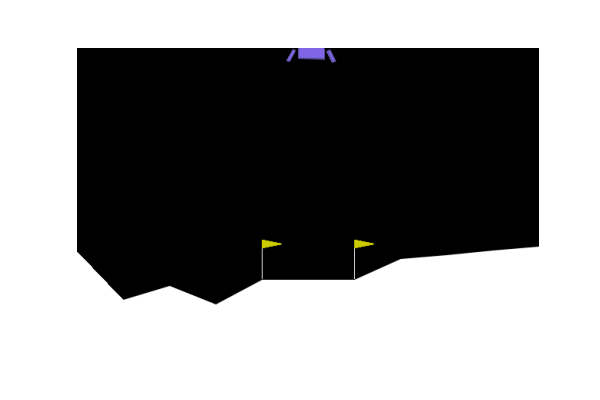

In [ ]:
# Создание анимации финального агента
def record_episode(model, env_name='LunarLander-v3', num_episodes=1):
    """Записывает эпизод с работой обученного агента"""
    env = gym.make(env_name, render_mode='rgb_array')

    frames = []
    for episode in range(num_episodes):
        obs, _ = env.reset()
        done = False
        truncated = False
        total_reward = 0

        while not (done or truncated):
            # Получение действия от модели
            action, _ = model.predict(obs, deterministic=True)

            # Выполнение шага
            obs, reward, done, truncated, info = env.step(action)
            total_reward += reward

            # Сохранение кадра
            frame = env.render()
            frames.append(frame)

        print(f"Эпизод {episode + 1}: общая награда = {total_reward:.2f}")

    env.close()
    return frames

def save_animation(frames, filename='lunar_lander_animation.gif'):
    """Создает GIF анимацию из кадров"""
    try:
        from matplotlib import animation
        import matplotlib.pyplot as plt

        # Берем каждый 2-й кадр для уменьшения размера
        frames = frames[::2]

        fig = plt.figure(figsize=(frames[0].shape[1] / 72, frames[0].shape[0] / 72), dpi=72)
        plt.axis('off')

        im = plt.imshow(frames[0])

        def animate(i):
            im.set_array(frames[i])
            return [im]

        anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50)
        anim.save(filename, writer='pillow', fps=20)
        plt.close()

        print(f"Анимация сохранена как {filename}")

        # Отображение в ноутбуке
        from IPython.display import Image
        return Image(filename=filename)

    except Exception as e:
        print(f"Ошибка при создании анимации: {e}")
        return None

# Создание анимации с лучшей моделью
print("Создание анимации работы агента...")
best_model = results[0.99]['model']  # Лучшая модель из эксперимента 2
frames = record_episode(best_model, num_episodes=2)
animation = save_animation(frames, 'lunar_lander_best.gif')

if animation:
    display(animation)

### Количественная оценка итогового агента

ФИНАЛЬНАЯ ОЦЕНКА ЛУЧШЕГО АГЕНТА (gamma=0.99)
Средняя награда за 20 эпизодов: 192.47 ± 90.85
Диапазон наград: [-32.14, 262.56]
Средняя длина эпизода: 403.0 шагов
Процент успешных посадок: 75.0%


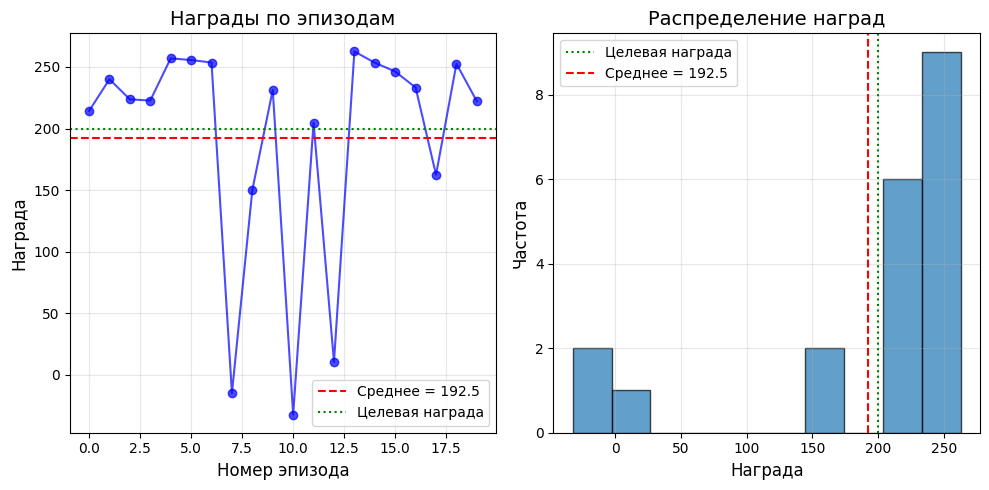


⚠️  Цель не достигнута: средняя награда 192.47 < 200
Возможные улучшения: больше эпох обучения, тонкая настройка гиперпараметров


In [ ]:
# Количественная оценка итогового агента
def evaluate_agent(model, num_episodes=20, render=False):
    """Полная оценка агента"""
    if render:
        env = gym.make('LunarLander-v3', render_mode='human')
    else:
        env = gym.make('LunarLander-v3')

    all_rewards = []
    episode_lengths = []
    successful_landings = 0

    for episode in range(num_episodes):
        obs, _ = env.reset()
        done = False
        truncated = False
        episode_reward = 0
        steps = 0

        while not (done or truncated):
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1

        all_rewards.append(episode_reward)
        episode_lengths.append(steps)

        # Считаем успешную посадку (награда > 200)
        if episode_reward > 200:
            successful_landings += 1

        if render:
            print(f"Эпизод {episode + 1}: награда = {episode_reward:.2f}, шагов = {steps}")

    env.close()

    # Статистика
    stats = {
        'mean_reward': np.mean(all_rewards),
        'std_reward': np.std(all_rewards),
        'min_reward': np.min(all_rewards),
        'max_reward': np.max(all_rewards),
        'mean_length': np.mean(episode_lengths),
        'success_rate': successful_landings / num_episodes * 100
    }

    return stats, all_rewards

# Оценка финального агента
print("=" * 50)
print("ФИНАЛЬНАЯ ОЦЕНКА ЛУЧШЕГО АГЕНТА (gamma=0.99)")
print("=" * 50)

final_stats, all_rewards = evaluate_agent(best_model, num_episodes=20)

print(f"Средняя награда за 20 эпизодов: {final_stats['mean_reward']:.2f} ± {final_stats['std_reward']:.2f}")
print(f"Диапазон наград: [{final_stats['min_reward']:.2f}, {final_stats['max_reward']:.2f}]")
print(f"Средняя длина эпизода: {final_stats['mean_length']:.1f} шагов")
print(f"Процент успешных посадок: {final_stats['success_rate']:.1f}%")

# Визуализация распределения наград
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(all_rewards, 'bo-', alpha=0.7)
plt.axhline(y=final_stats['mean_reward'], color='r', linestyle='--', label=f'Среднее = {final_stats["mean_reward"]:.1f}')
plt.axhline(y=200, color='g', linestyle=':', label='Целевая награда')
plt.xlabel('Номер эпизода', fontsize=12)
plt.ylabel('Награда', fontsize=12)
plt.title('Награды по эпизодам', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(all_rewards, bins=10, alpha=0.7, edgecolor='black')
plt.axvline(x=200, color='g', linestyle=':', label='Целевая награда')
plt.axvline(x=final_stats['mean_reward'], color='r', linestyle='--',
            label=f'Среднее = {final_stats["mean_reward"]:.1f}')
plt.xlabel('Награда', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение наград', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Вывод о достижении цели
if final_stats['mean_reward'] >= 200:
    print("\n✅ АГЕНТ УСПЕШНО ОБУЧЕН!")
    print(f"Цель достигнута: средняя награда {final_stats['mean_reward']:.2f} ≥ 200")
else:
    print(f"\n⚠️  Цель не достигнута: средняя награда {final_stats['mean_reward']:.2f} < 200")
    print("Возможные улучшения: больше эпох обучения, тонкая настройка гиперпараметров")